<img style="direction:rtl;" src="./../data/besm.png" alt="In the name of Allah" width="150">

In [3]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
chineas_alphabet = ["诶","诶","必","比西","西弟","迪衣","伊艾付","艾弗","记","吉","爱耻","艾尺","挨","艾","宅","杰","开","开","饿罗","艾勒","饿母","艾马","恩","艾娜","呕","","哦","披","屁","酷","吉吾","耳","艾儿","艾斯","艾丝","踢","提","tí忧","伊吾","维","维","大波留","豆贝尔维","埃克斯","艾克斯","歪","吾艾","再得","贼德"]
persian_alphabet = ["آ","ا","ب","پ","ت","س","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","ل","م","ن","و","ه","ی"]
other_alphabet = ["ي", "ڈ", "ۍ", "څ", "ۀ", "ې", "ځ", "ډ", "ټ","ړ", "ڼ","ؤ", "ږ","ښ"]
decorativeـsigns = [" ", ",", ":", "؛", "|", "\\", "*", " ", "٬", "!", "؟", "?", "(", ")", ".", "،"]
number_alphabet = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

In [3]:
emojis_df = pd.read_csv("./../data/emojis.csv", names=["emoji", "desciption"])
emoji_alphabet = emojis_df.emoji.to_numpy()
emojis_df

,emoji,desciption
0,😀,Grinning Face
1,😁,Beaming Face With Smiling Eyes
2,😂,Face With Tears of Joy
3,🤣,Rolling on the Floor Laughing
4,😃,Grinning Face With Big Eyes
...,...,...
1528,🇿🇲,Zambia
1529,🇿🇼,Zimbabwe
1530,🏴󠁧󠁢󠁥󠁮󠁧󠁿,England
1531,🏴󠁧󠁢󠁳󠁣󠁴󠁿,Scotland


In [4]:
import time
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

In [5]:
f = open("./../result/comments_with_emoji.txt", "r")
comments_with_emoji = f.readlines()
f.close()
len(comments_with_emoji)

58688

In [6]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

In [7]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in comments_with_emoji:
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)
emoji_dict

{'😍': 11566,
 '❤': 9522,
 '👌': 8010,
 '👍': 6153,
 '😂': 3560,
 '😘': 3186,
 '👏': 2755,
 '🤩': 2310,
 '♥': 1900,
 '🌹': 1604,
 '😭': 1584,
 '🤣': 1458,
 '😊': 1424,
 '🙏': 1277,
 '💜': 1269,
 '💖': 1054,
 '💙': 997,
 '😁': 992,
 '😐': 775,
 '😉': 706,
 '💕': 701,
 '🙂': 697,
 '💗': 697,
 '😢': 667,
 '💚': 640,
 '😅': 634,
 '💛': 628,
 '😄': 610,
 '😔': 565,
 '🤗': 554,
 '😀': 547,
 '😃': 546,
 '😎': 532,
 '🧡': 518,
 '☺': 496,
 '💋': 484,
 '💞': 435,
 '😇': 416,
 '🖤': 415,
 '🌷': 411,
 '✌': 380,
 '💓': 380,
 '😚': 368,
 '💝': 357,
 '🌺': 348,
 '😑': 339,
 '😆': 334,
 '🌸': 334,
 '😙': 324,
 '😻': 299,
 '💔': 284,
 '😗': 245,
 '😱': 239,
 '😥': 237,
 '💟': 220,
 '😒': 216,
 '✨': 207,
 '🔥': 206,
 '⭐': 203,
 '❣': 196,
 '💯': 196,
 '😜': 191,
 '🙃': 190,
 '💐': 175,
 '🤔': 174,
 '💪': 163,
 '👎': 163,
 '😋': 160,
 '😌': 155,
 '🙄': 143,
 '😞': 143,
 '👑': 140,
 '😏': 133,
 '😶': 132,
 '🌈': 129,
 '😕': 127,
 '😪': 124,
 '💫': 124,
 '☹': 122,
 '🌟': 121,
 '💎': 121,
 '🙌': 111,
 '😬': 110,
 '💘': 108,
 '🤤': 100,
 '😡': 99,
 '🌼': 99,
 '😓': 93,
 '😨': 91,
 '😳': 89

In [8]:
print(f"The percentage of emojis in the text compared to the total emojis: {int(len(emoji_dict_nonzero)/len(emoji_dict)*100)}%")
top_num_to_show = 10
print(f"Top {top_num_to_show} emojis: {list(emoji_dict.keys())[:top_num_to_show]}")

The percentage of emojis in the text compared to the total emojis: 45%
Top 10 emojis: ['😍', '❤', '👌', '👍', '😂', '😘', '👏', '🤩', '♥', '🌹']


/Users/m213/Library/anaconda3/envs/my-conda-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/m213/Library/anaconda3/envs/my-conda-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/m213/Library/anaconda3/envs/my-conda-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/m213/Library/anaconda3/envs/my-conda-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/m213/Library/anaconda3/envs/my-conda-env/lib/python3.10/site-packages/IPytho

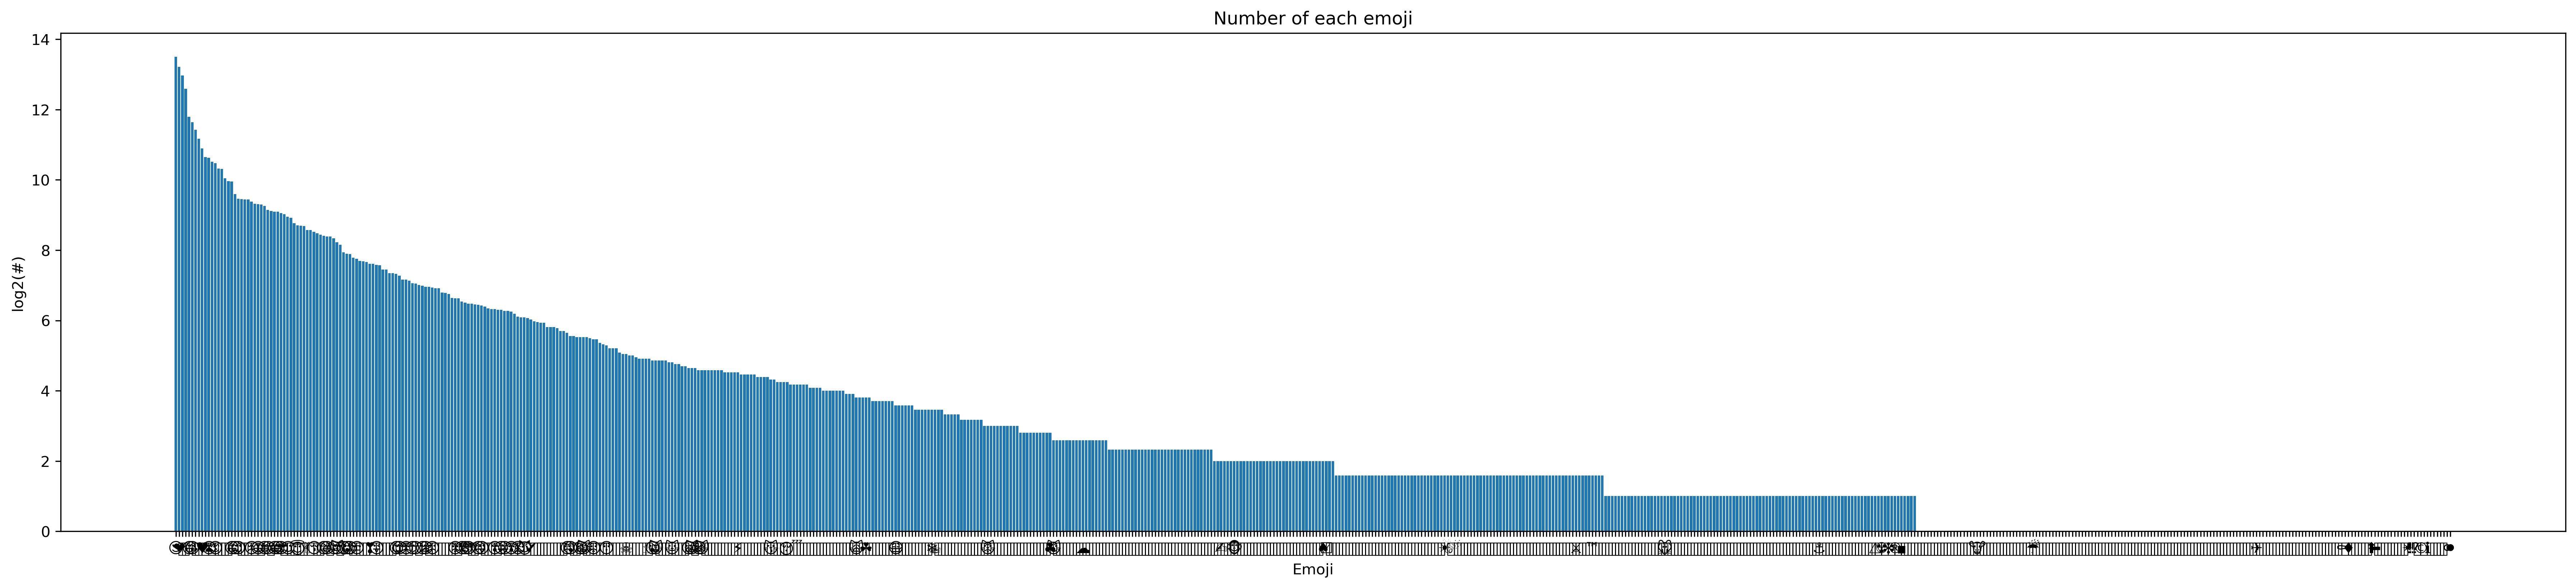

In [9]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

### Preprocessing

In [3]:
from wordcloud_fa import WordCloudFa
import pandas as pd

In [4]:
comments = pd.read_csv('./../result/comments_edited.txt', names=["genre", "title", "comment"], delimiter='\t')
comments

,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,دیدن این فیلمو به همه پیشنهاد میکنم.متاسفانه ه...
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,خییلی قشنگ بودیکی از بهترین پایان هایی بود که ...
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را...
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,ارزش وقت گذاشتن رو داره پشیمون نمیشین
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,بسیار فیلم قشنگی بود مخصوصا آخر فیلم خیلی خوب ...
...,...,...,...
394421,action,سریال خطرناک ترین بازی (Most Dangerous Game 20...,بسیار موضوع جالبی داشت ولی میشد خیلی خوش ساختر...
394422,action,سریال خطرناک ترین بازی (Most Dangerous Game 20...,عاااالی، داستان فیلم جدید و جذابه👌🏻
394423,action,سریال خطرناک ترین بازی (Most Dangerous Game 20...,ننددیدد میگگم عالیه بازیگراروو ماشالاه داره د...
394424,action,سریال خطرناک ترین بازی (Most Dangerous Game 20...,خیلی عالی بود پیشنهادمیکنم حتما ببینید و از دس...


In [16]:
comments['title'][0].split('|')[0]

'فیلم قدغن'

In [18]:
contain_values = comments[comments['title'].str.contains(comments['title'][0].split('|')[0])]
f = open('./../result/test_cloud.txt', 'w')
for comment in contain_values['comment']:
    f.write(f'{comment}\n')
f.close()

In [24]:
f = open('./../result/test_cloud.txt', 'r')
text = ''
for t in f.readlines():
    text = f'{text} {t}'
f.close()

text = text.replace('\n', ' ')
text

' دیدن این فیلمو به همه پیشنهاد میکنم.متاسفانه هستن هوس بازای پولداری که فک میکنن میشه عفت و آبرو رو با پول خرید.و یه نقش متفاوت از سام درخشانی  خییلی قشنگ بودیکی از بهترین پایان هایی بود که تاحالا دیدمآخرش با کار مرتضی از ته دل دلم خنگ شد  درسته غمگین بود ولی زیبا بود پیشنهاد میکنم ببینید و نیدونم چرا رای کم آورده حقش خیلی بیشتره و به نظر من باید جایزه های زیادی میبرد  توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را دیدم، واقعیت جامعه و واقعا و به شدت با احساساتم بازی شد، حتما پیشنهاد میکنم. کاش بیشتر از این فیلم حمایت میشد. با فیلم های هالیوودی برابری میکرد🤣🤣🤣  ارزش وقت گذاشتن رو داره پشیمون نمیشین  بسیار فیلم قشنگی بود مخصوصا آخر فیلم خیلی خوب تمام شد عااالی  عاالی بود   بسیار زیبا بود   عالی و اموزنده  ارزش دیدن داره👌  خیلی قشنگه، عالی  عالی،حتما ببینین.  خیلی خوب بود  عالی بود واقعا پیشنهاد میکنم ببینیم فقط نمیدونم چرا رای کم آورده   خوب بود، ارزش دیدن داشت.   بسیار عالی   قشنگ بود  پسندیدم 👍  خیلی قشنگ بود و لذت بردم بازی سام درخشانی عالی بود   واقعا عالی بود   خیلی خوب بود.  خیلی

In [40]:
wordcloud = WordCloudFa(persian_normalize=True, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
image.show()

In [5]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


In [6]:
genres = ["drama", "war", "adventure", "sci-fi", "romance", 
          "horror", "mystery", "family", "musical", "talk-show", 
          "short", "reality-tv", "history", "action", "fantasy", 
          "comedy", "western", "crime", "thriller", "sport", 
          "documentary", "music", "religious", "concert", 
          "biography", "theatre"]

num = {}
for m in genres:
    num[m] = 0
for m in movies["genre"]:
    num[m] += 1
num

{'drama': 752,
 'war': 82,
 'adventure': 483,
 'sci-fi': 113,
 'romance': 150,
 'horror': 200,
 'mystery': 165,
 'family': 234,
 'musical': 49,
 'talk-show': 70,
 'short': 152,
 'reality-tv': 35,
 'history': 111,
 'action': 569,
 'fantasy': 118,
 'comedy': 415,
 'western': 28,
 'crime': 381,
 'thriller': 236,
 'sport': 50,
 'documentary': 228,
 'music': 30,
 'religious': 42,
 'concert': 18,
 'biography': 208,
 'theatre': 24}

In [7]:
num['drama'] + num['war'] + num['adventure'] + num['sci-fi'] + num['romance'] \
+ num['horror'] + num['mystery'] + num['family'] + num['musical'] + num['talk-show'] \
+ num['short'] + num['reality-tv'] + num['history'] + num['action'] + num['fantasy'] \
+ num['comedy'] + num['western'] + num['crime']

4107